In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [2]:
def plot_hist(df, column):
    df[column].plot.hist(title=f'Histogram of {column}', xlabel='Value', ylabel='Frequency')
    plt.show()
    print("Min:", np.min(df[column]), "Max:", np.max(df[column]))

def plot_hist_with_min_max(df, column, val_min, val_max):
    

    # Filter the DataFrame based on the minimum and maximum values
    df = df[(df[column] >= val_min) & (df[column] <= val_max)]
    
    df[column].plot.hist(title=f'Histogram of {column}', xlabel='Value', ylabel='Frequency')
    plt.show()
    print("Min:", np.min(df[column]), "Max:", np.max(df[column]))
    
def corr_matrix_with_threshold(df, threshold, title_str = "Filtered Correlation Matrix (Half Square)"):
    # Add target column to the DataFrame
    corr_matrix = df.corr()
    # Filter the correlation matrix based on the threshold
    filtered_matrix = corr_matrix[corr_matrix.abs() > threshold]
    mask = np.triu(np.ones_like(filtered_matrix, dtype=bool))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(filtered_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
    plt.title(title_str)
    plt.show()

    

In [3]:
# load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test_partial_answer = pd.read_csv('test_partial_answer.csv')

In [4]:
print(df_train.columns)
print(df_test.columns)
print(df_test_partial_answer.columns)

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'Album_type', 'Licensed',
       'official_video', 'id', 'Track', 'Album', 'Uri', 'Url_spotify',
       'Url_youtube', 'Comments', 'Description', 'Title', 'Channel',
       'Composer', 'Artist'],
      dtype='object')
Index(['Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
       'Views', 'Likes', 'Stream', 'Album_type', 'Licensed', 'official_video',
       'id', 'Track', 'Album', 'Uri', 'Url_spotify', 'Url_youtube', 'Comments',
       'Description', 'Title', 'Channel', 'Composer', 'Artist'],
      dtype='object')
Index(['id', 'Danceability'], dtype='object')


In [5]:
print(df_train.shape)
print(df_test.shape)
print(df_test_partial_answer.shape)

(17170, 29)
(6315, 28)
(631, 2)


In [6]:
def display_data(df, idx):
    print(df.loc[idx])
    print(df.loc[idx]['Url_spotify'])
    print(df.loc[idx]['Url_youtube'])
    print("--------------")


In [7]:
display_data(df_train, 81)
display_data(df_train, 84)
display_data(df_train, 104)

Danceability                                                      6.0
Energy                                                       0.371695
Key                                                               6.0
Loudness                                                      -12.734
Speechiness                                                     0.048
Acousticness                                                 0.103823
Instrumentalness                                              0.00121
Liveness                                                     0.085184
Valence                                                         0.972
Tempo                                                             NaN
Duration_ms                                                  220733.0
Views                                                     418957377.0
Likes                                                       3435429.0
Stream                                                    262132318.0
Album_type          

In [8]:
df_test_partial_answer.tail(5)

,id,Danceability
626,23462,4.0
627,23463,7.0
628,23473,5.0
629,23482,3.0
630,23484,2.0


In [9]:
df_all = pd.concat([df_train, df_test]).reset_index(drop=True)

arr_index_label_partial_answer = df_test_partial_answer['id'].values
arr_value_label_partial_answer = df_test_partial_answer['Danceability'].values
i = 0
for idx in arr_index_label_partial_answer:
    df_all.loc[idx,'Danceability'] = arr_value_label_partial_answer[i]
    i +=1
    
df_validation = df_all.loc[arr_index_label_partial_answer]    

print(df_validation.loc[23482])
print(df_validation.loc[23482]['Url_spotify'])
print(df_validation.loc[23482]['Url_youtube'])
df_validation.tail(5)

Danceability                                                      3.0
Energy                                                       0.426223
Key                                                               5.0
Loudness                                                    -5.807545
Speechiness                                                  0.072906
Acousticness                                                 0.661708
Instrumentalness                                             0.898308
Liveness                                                     0.000662
Valence                                                      0.087281
Tempo                                                       87.969239
Duration_ms                                              185842.04775
Views                                                 -3451739.821017
Likes                                                    23051.629825
Stream                                                18490943.259002
Album_type          

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
23462,4.0,0.307725,7.0,-2.533880,0.033415,NaN,0.013672,0.001309,0.770259,95.871722,...,Alphagene II,spotify:track:04sN26COy28wTXYj3dMoiZ,https://open.spotify.com/artist/6twIAGnYuIT1pn...,NaN,6036.0,Simone Lamsma (violin) - Davida Scheffers (cor...,"Sigala, Paloma Faith - Lullaby",David Bowie - Topic,Finneas O'Connell,NaN
23463,7.0,0.269900,0.0,-11.299350,0.104984,0.006946,0.001588,0.001355,0.466107,103.858359,...,NaN,spotify:track:072YgF7J2clpY8DsWOpEri,https://open.spotify.com/artist/7hJcb9fa4alzcO...,NaN,940.0,"The official video of ""Ride Out"" by Kid Ink, T...",Cássia Eller - O Segundo Sol,BryantMyersVEVO,Mike Dean,Kurt Vile
23473,5.0,0.480568,8.0,-3.828332,NaN,0.153384,0.001714,0.000114,0.287141,91.755727,...,In A Time Lapse,spotify:track:2Y90nL1ohB4sgYELDs7uNx,https://open.spotify.com/artist/5JZ7CnR6gTvEMK...,https://www.youtube.com/watch?v=NIdWvUuEBB0,202.0,'Blank Space' taken from the I Prevail EP 'Hea...,SIDO - Medizin (feat. Jamule) [prod. Beatgees ...,AnaGabrielArgentina,Finneas O'Connell,Ed Sheeran
23482,3.0,0.426223,5.0,-5.807545,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,...,Young Right Now,spotify:track:6mz1fBdKATx6qP4oP1I65G,https://open.spotify.com/artist/4V8Sr092TqfHkf...,https://www.youtube.com/watch?v=ru3gH27Fn6E,NaN,"Die Ärzte; offizielles Video zu ""Deine Schuld""...",Sleepy Hallow - Breaking Bad (Okay) ft. Sheff ...,Kappa Originals,"Noah ""40"" Shebib","Tyler, The Creator"
23484,2.0,0.014679,NaN,NaN,0.082686,0.076426,0.214188,0.001583,0.735073,98.873933,...,NaN,spotify:track:5ln5yQdUywVbf8HhFsOcd6,NaN,https://www.youtube.com/watch?v=yxukv0gAhgY,11.0,NaN,Nas - The World Is Yours (Official HD Video),ChristmasTimeTV,Juicy J,J. Cole


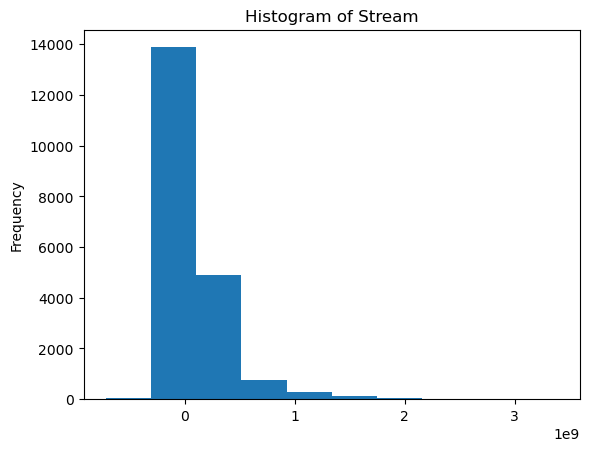

Min: -713372498.9844733 Max: 3386520288.0


In [10]:
plot_hist(df_all, 'Stream')

* Training: 17170
* Test: 6315
* Validation: 631

NB: 631 Validation is 10% from the Test (6315)

In [11]:
df_train.dtypes

Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Stream              float64
Album_type           object
Licensed             object
official_video       object
id                    int64
Track                object
Album                object
Uri                  object
Url_spotify          object
Url_youtube          object
Comments            float64
Description          object
Title                object
Channel              object
Composer             object
Artist               object
dtype: object

In [12]:
def create_dictionary(keys):
    dictionary = {}
    for key in keys:
        dictionary[key] = None  
    return dictionary


def data_process_keep_only_numerical(input_data):
    numeric_columns = input_data.select_dtypes(include=['int64', 'float64'])
    return numeric_columns

def word_dictionary(arr_columns, input_train, input_test):
    # Append the two DataFrames
    appended_df = pd.concat([input_train, input_test])
    appended_df.reset_index(drop=True, inplace=True)
    arr_word_dict = {}
    for col in arr_columns:
        uniq_tmp = appended_df[col].unique()
        arr_dict = {value: value if isinstance(value, (int, float)) and np.isnan(value) else index for index, value in enumerate(uniq_tmp)}
        arr_word_dict[col] = arr_dict
    return arr_word_dict

word_dict = word_dictionary([
    'Album_type', 'Licensed', 'official_video', 'Track', 'Album', 'Uri', 'Url_spotify', 'Url_youtube', 
    'Description', 'Title', 'Channel', 'Composer', 'Artist'], df_train, df_test)

# Using Dictionary:
#   Album_type, Licensed, official_video, Composer, Channel, Artist
# Can be removed:
#   Uri, Url_spotify, Url_youtube
# Cannot use word_dict:
#   Track, Album, Description, Title
# ret_train.head()
# ret_test.head()

In [13]:
word_dict['Album_type']

{'album': 0, nan: nan, 'single': 2, 'compilation': 3}

In [14]:
df_train.head(4)

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
0,0.0,0.000273,3.0,-25.176,0.0443,0.724151,0.000062,0.000807,0.340,83.398,...,Sinkovsky Plays and Sings Vivaldi,spotify:track:7njAZhca4o80qQdCgyEWya,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=NzCL9uLkQSI,3070.0,Antonio Vivaldi's 4th Concerto - From his Most...,"Antonio Vivaldi - Concerto No.4 in F minor, Op...",Mozafunkula,NaN,Marshmello
1,0.0,0.184220,7.0,NaN,NaN,0.672221,0.910000,0.034966,0.746,148.692,...,NaN,spotify:track:2nnXe7n3Vivs7OfQKRsfWD,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=jAnzlpPuIDU,122.0,"A. Vivaldi Concerto No. 2 in G minor, RV 315, ...","A. Vivaldi Concerto No. 2 in G minor, RV 315, ...",Anton Paisov,Finneas O'Connell,Bon Iver
2,0.0,NaN,6.0,-15.596,NaN,0.667628,0.867000,0.001772,0.380,84.899,...,Vivaldi: The Four Seasons,spotify:track:0VQMAup2VdeQWLCvM14Uz2,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=jAnzlpPuIDU,122.0,"A. Vivaldi Concerto No. 2 in G minor, RV 315, ...",NaN,Anton Paisov,Finneas O'Connell,Kamasi Washington
3,1.0,0.209585,NaN,-6.251,0.0277,0.003796,NaN,0.001000,NaN,150.220,...,Life Thru A Lens,spotify:track:1M2nd8jNUkkwrc1dgBPTJz,https://open.spotify.com/artist/2HcwFjNelS49kF...,https://www.youtube.com/watch?v=luwAMFcc2f8,24350.0,25 years of Life Thru A Lens. Pre-order the br...,Robbie Williams - Angels,robbiewilliamsvevo,Louis Bell,Drake


In [15]:
def data_convert(df, word_dict):
    df_ret = df.copy()
    for dic in word_dict:
        print(dic)
        for key_dic in word_dict[dic]:
            df_ret.loc[df_ret[dic] == key_dic, dic] = word_dict[dic][key_dic]
    return df_ret     

In [16]:
df_train_embedding = data_convert(df_train, word_dict)

Album_type
Licensed
official_video
Track
Album
Uri
Url_spotify
Url_youtube
Description
Title
Channel
Composer
Artist


In [17]:
df_test_embedding = data_convert(df_test, word_dict)

Album_type
Licensed
official_video
Track
Album
Uri
Url_spotify
Url_youtube
Description
Title
Channel
Composer
Artist


In [18]:
obj_columns = df_train_embedding.select_dtypes(include=['object']).columns
# print(int_columns)
# convert integer columns to float
df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float64)

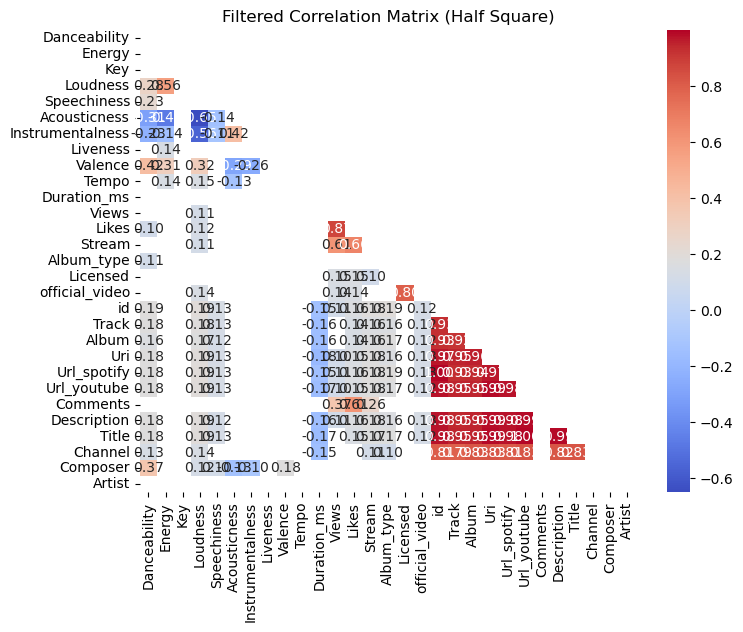

In [19]:
corr_matrix_with_threshold(df_train_embedding, 0.1)

In [20]:
def keep_important_column(df, arr_column, is_test= False):
    df_copy = df.copy()
    if is_test:
        arr_column.remove('Danceability')
    return df_copy[arr_column]

def remove_unimportant_column(df, arr_column):
    df_dropped = df.drop(arr_column, axis=1)
    return df_dropped

In [21]:
arr_IMPORTANT = [  'Danceability', 'Liveness', 'Energy', 'Valence', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Duration_ms', 'Tempo']
df_train_embedding_important = keep_important_column(df_train_embedding, arr_IMPORTANT, False)
df_test_embedding_important = keep_important_column(df_test_embedding, arr_IMPORTANT, True)

In [22]:
df_train_embedding_important

,Danceability,Liveness,Energy,Valence,Loudness,Speechiness,Acousticness,Instrumentalness,Duration_ms,Tempo
0,0.0,0.000807,0.000273,0.3400,-25.176,0.0443,7.241508e-01,0.000062,117907.0,83.398
1,0.0,0.034966,0.184220,0.7460,NaN,NaN,6.722214e-01,0.910000,173427.0,148.692
2,0.0,0.001772,NaN,0.3800,-15.596,NaN,6.676276e-01,0.867000,150667.0,84.899
3,1.0,0.001000,0.209585,NaN,-6.251,0.0277,3.796416e-03,NaN,265000.0,150.220
4,4.0,0.002924,NaN,0.2950,NaN,0.0260,3.048625e-06,0.000467,263867.0,97.997
...,...,...,...,...,...,...,...,...,...,...
17165,3.0,0.000591,0.794023,0.6580,-6.344,0.0328,8.991539e-02,0.000000,94667.0,90.002
17166,2.0,0.000786,0.820026,0.6570,-1.786,NaN,2.195200e-05,0.000000,150857.0,174.869
17167,1.0,0.003652,0.571787,0.4190,-4.679,0.0647,NaN,0.000000,136842.0,168.388
17168,1.0,0.001260,0.451218,0.5390,NaN,0.4190,4.511802e-02,NaN,108387.0,155.378


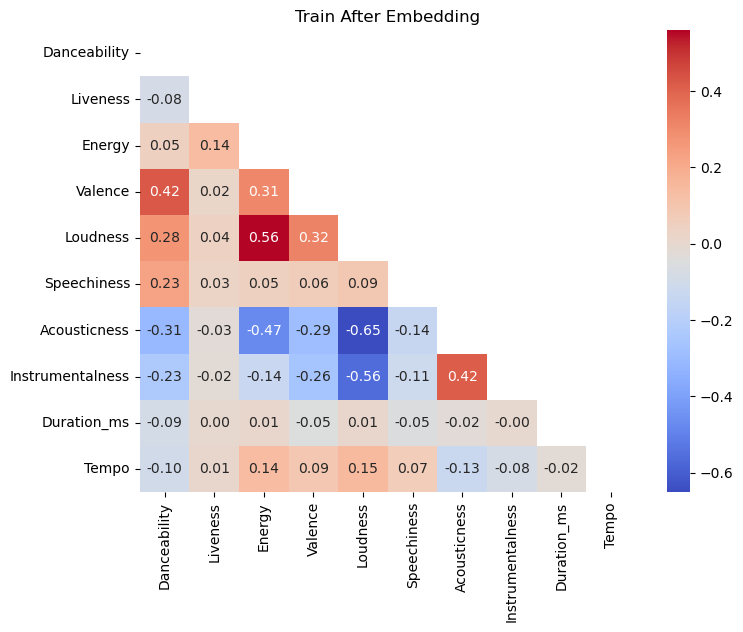

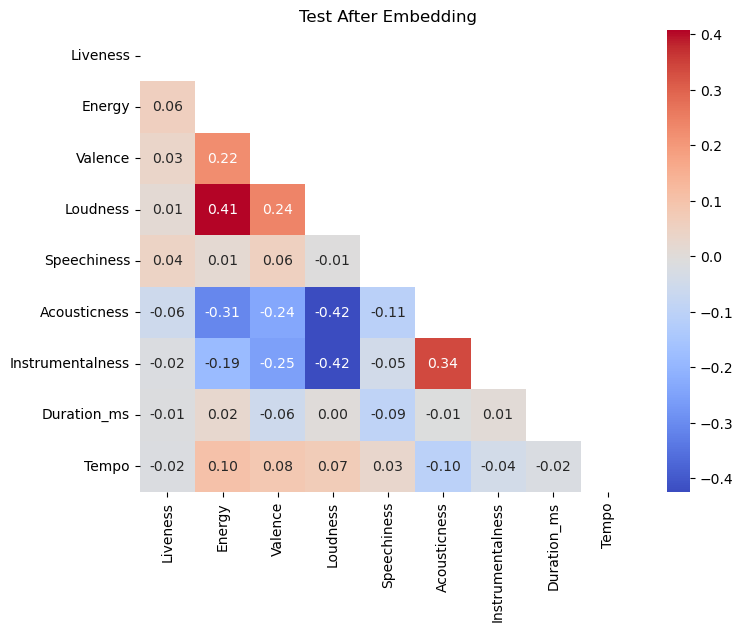

In [23]:
corr_matrix_with_threshold(df_train_embedding_important, 0, "Train After Embedding")
corr_matrix_with_threshold(df_test_embedding_important, 0, "Test After Embedding")

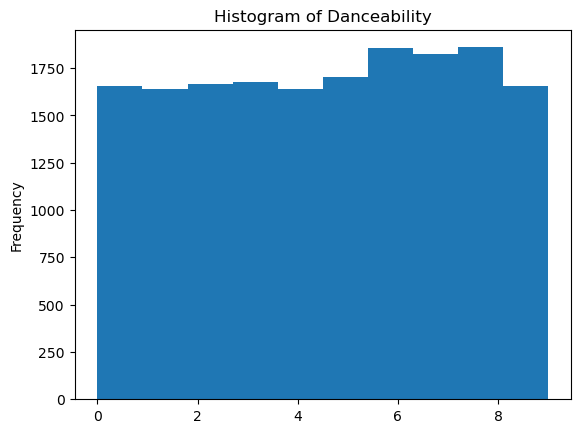

Min: 0.0 Max: 9.0


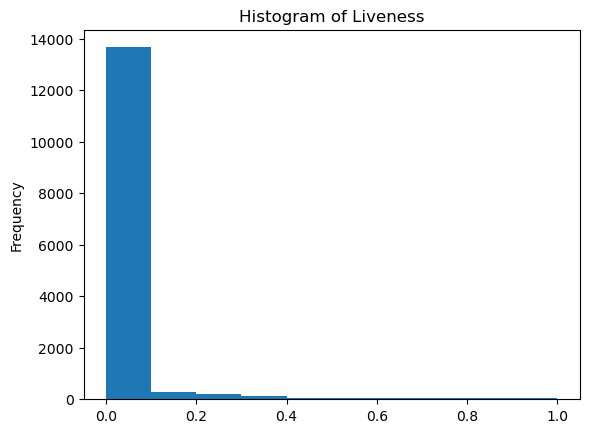

Min: 3.0486250000000004e-06 Max: 1.0


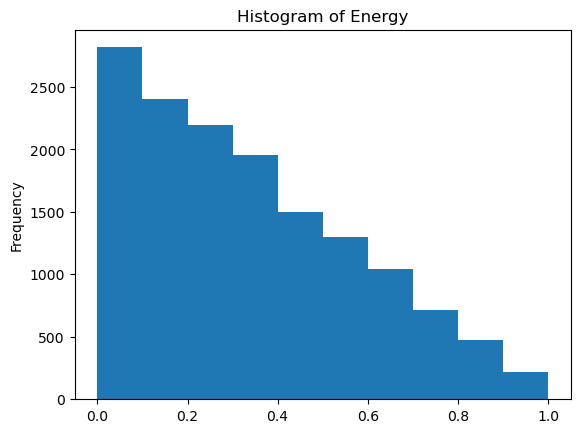

Min: 8.365426999999998e-15 Max: 1.0


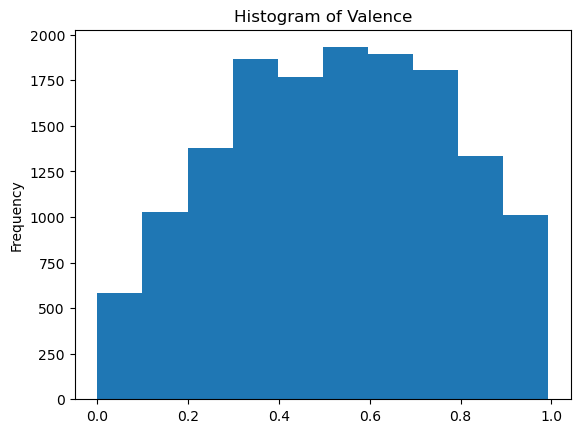

Min: 0.0 Max: 0.993


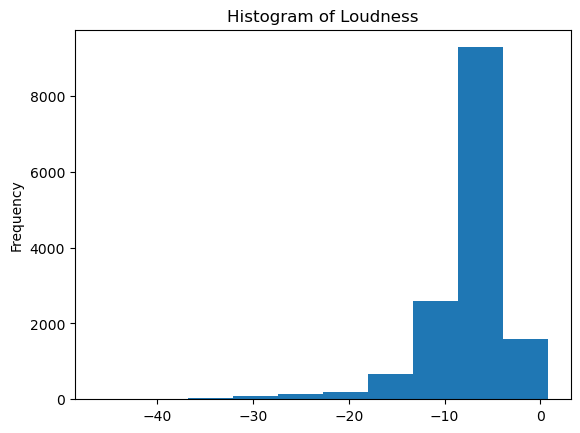

Min: -46.251 Max: 0.829


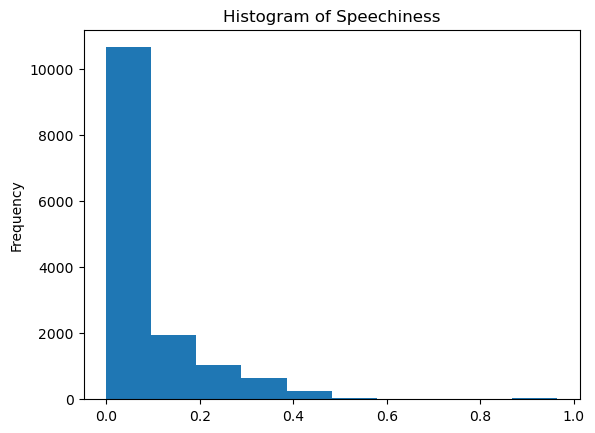

Min: 0.0 Max: 0.964


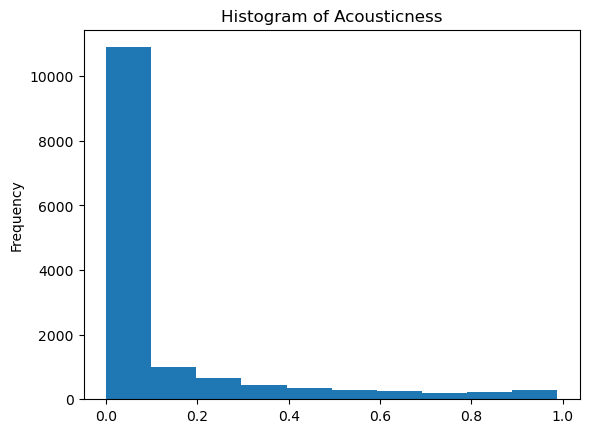

Min: 1.3676309999999998e-18 Max: 0.988047936


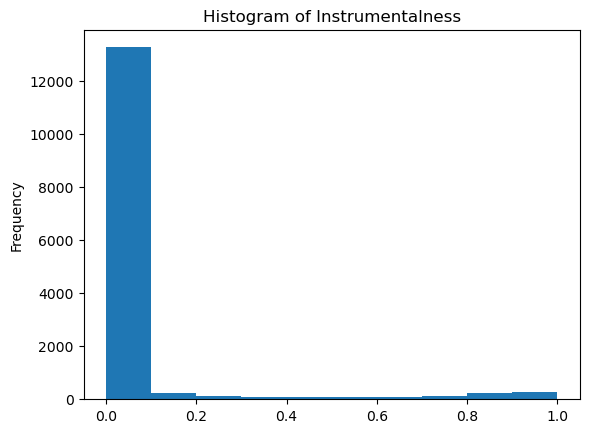

Min: 0.0 Max: 1.0


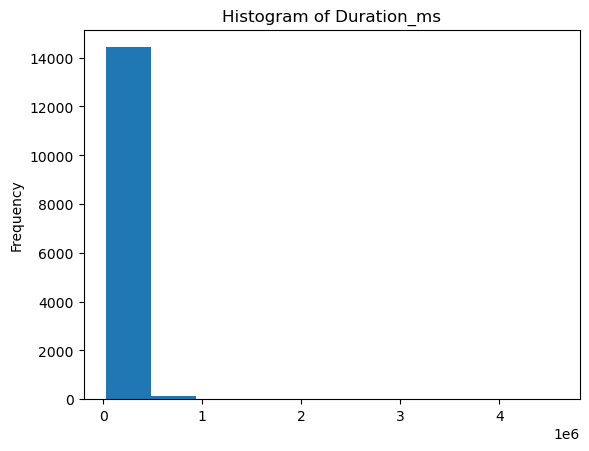

Min: 30985.0 Max: 4581483.0


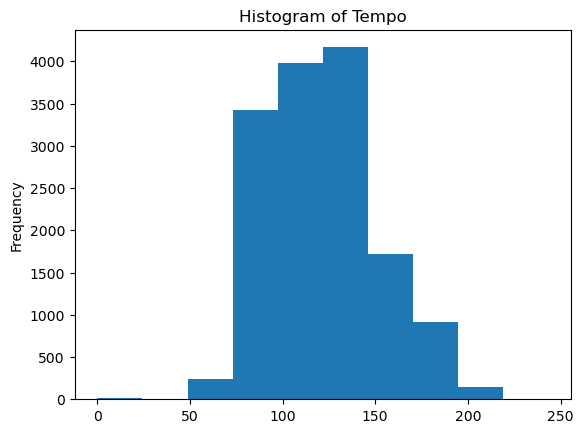

Min: 0.0 Max: 243.372


In [24]:
import matplotlib.pyplot as plt

for cols in df_train_embedding_important.columns:
        plot_hist(df_train_embedding_important, cols)



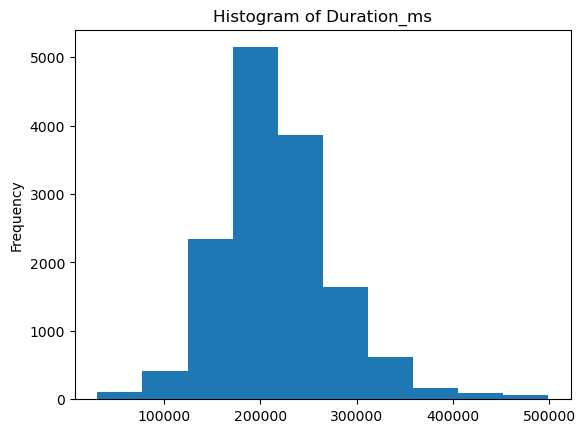

Min: 30985.0 Max: 498867.0


In [25]:
plot_hist_with_min_max(df_train_embedding_important, 'Duration_ms', 0, 500000.0)

In [26]:
def convert_decibel_to_numerical(dB_value):
    return 10**(dB_value / 10)

def categorize_values(value, min_value, max_value, num_categories):
    if np.isnan(value):
        return np.nan
    segment_size = (max_value - min_value) / num_categories
    category = int((value - min_value) // segment_size) + 1
    if category < 1:
        return 0
    elif category > num_categories:
        return num_categories+1
    else:
        return category

def conditioning(df):
    df_tmp = df.copy()
#     df_tmp['Loudness2'] = df_tmp['Loudness'].apply(lambda x: convert_decibel_to_numerical(x)) 
#     df_tmp = df_tmp.drop(['Loudness'], axis=1)

#     val_max = np.max(df_tmp['Duration_ms'])
#     val_min = np.min(df_tmp['Duration_ms'])
#     df_tmp['Duration_ms2'] = df_tmp['Duration_ms'].apply(lambda x: categorize_values(x, val_min, val_max, 10))
#     df_tmp = df_tmp.drop(['Duration_ms'], axis=1)
    
#     val_max = np.max(df_tmp['Tempo'])
#     val_min = np.min(df_tmp['Tempo'])
#     df_tmp['Tempo2'] = df_tmp['Tempo'].apply(lambda x: categorize_values(x, val_min, val_max, 20))
#     df_tmp = df_tmp.drop(['Tempo'], axis=1)
    
    
    return df_tmp

In [27]:
df_train_embedding_important_non_danceability = df_train_embedding_important.iloc[:,1:]

df_all_to_conditioning = pd.concat([df_train_embedding_important_non_danceability, df_test_embedding_important])


df_all_to_conditioning_after_conditioning = conditioning(df_all_to_conditioning)
df_train_embedding_important_non_danceability_after_conditioning = df_all_to_conditioning_after_conditioning.iloc[:len(df_train_embedding_important),:]
df_test_embedding_important_non_danceability_after_conditioning = df_all_to_conditioning_after_conditioning.iloc[len(df_train_embedding_important):,:]


In [28]:
df_all_to_conditioning_after_conditioning.shape

(23485, 9)

In [29]:
# plot_hist(df_train_embedding_important_non_danceability_after_conditioning, 'Duration_ms2')
# plot_hist_with_min_max(df_train_embedding_important_non_danceability_after_conditioning, 'Duration_ms2',0,3)
# plot_hist(df_test_embedding_important_non_danceability_after_conditioning, 'Duration_ms2')

## Imputation

In [30]:
df_all_to_conditioning_after_conditioning

,Liveness,Energy,Valence,Loudness,Speechiness,Acousticness,Instrumentalness,Duration_ms,Tempo
0,0.000807,0.000273,0.340000,-25.176000,0.044300,0.724151,0.000062,117907.000000,83.398000
1,0.034966,0.184220,0.746000,NaN,NaN,0.672221,0.910000,173427.000000,148.692000
2,0.001772,NaN,0.380000,-15.596000,NaN,0.667628,0.867000,150667.000000,84.899000
3,0.001000,0.209585,NaN,-6.251000,0.027700,0.003796,NaN,265000.000000,150.220000
4,0.002924,NaN,0.295000,NaN,0.026000,0.000003,0.000467,263867.000000,97.997000
...,...,...,...,...,...,...,...,...,...
6310,0.001642,0.160377,0.160253,-6.366894,0.045451,0.317692,0.006016,233721.956648,72.136829
6311,0.008843,0.318585,0.614366,-4.148566,0.073000,0.007420,0.000817,138726.388393,NaN
6312,0.000662,0.426223,0.087281,-5.807545,0.072906,0.661708,0.898308,185842.047750,87.969239
6313,0.030605,0.204440,0.482987,-11.563964,0.037676,0.003631,0.491785,180639.352865,NaN


In [31]:
# we got around 5500 clean data without N/A
# it means that it got around 12000 non-clean data

df_with_clean_data = df_all_to_conditioning_after_conditioning.dropna()
print("Clean Data without NaN:", len(df_with_clean_data))
print("Data with NaN:", len(df_all_to_conditioning_after_conditioning) - len(df_with_clean_data))


Clean Data without NaN: 5406
Data with NaN: 18079


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import itertools


def evaluate_MSE_is_imputation_for_target_column_with_KNN_is_the_correct_strategy(df, important_columns, target_column):
#     print("Target", target_column)
#     print("Supporting", important_columns)
    y = df[target_column]
    X = df.drop(target_column, axis=1)
    X = X[important_columns]
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = KNeighborsRegressor(n_neighbors=20)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

#     print("Mean Squared Error:", mse, "Mean Absolute Error:", mae)
#     print("------------------------------")
    return mse, mae


arr_best_combination_imputation = {}
for target in df_with_clean_data.columns:
    non_target = df_with_clean_data.columns.drop([target])
        
    # Generate combinations
    combinations = []
    for r in range(1, len(non_target) + 1):
        combinations.extend(list(itertools.combinations(non_target, r)))

    # Print the combinations
    min_mae, min_mse = np.inf, np.inf
    best_combination = []
    for combo in combinations:
        
        mse, mae = evaluate_MSE_is_imputation_for_target_column_with_KNN_is_the_correct_strategy(
            df_with_clean_data, 
            np.array(combo), 
            target
        )
        if min_mse > mse:
            min_mse = mse
            min_mae = mae
            best_combination = np.array(combo)
    
    arr_best_combination_imputation[target] = {'combination': best_combination, 'mse': min_mse, 'mae': min_mae}

arr_best_combination_imputation

{'Liveness': {'combination': array(['Energy', 'Valence', 'Speechiness', 'Acousticness',
         'Instrumentalness'], dtype='<U16'),
  'mse': 0.011755849197161052,
  'mae': 0.043863020433057835},
 'Energy': {'combination': array(['Liveness', 'Valence', 'Loudness', 'Acousticness'], dtype='<U12'),
  'mse': 0.03298316162352652,
  'mae': 0.13620929609753632},
 'Valence': {'combination': array(['Liveness', 'Energy', 'Speechiness', 'Instrumentalness'],
        dtype='<U16'),
  'mse': 0.049474169031071574,
  'mae': 0.1834442351572268},
 'Loudness': {'combination': array(['Energy', 'Instrumentalness'], dtype='<U16'),
  'mse': 6.647303449602138,
  'mae': 1.8579976481402953},
 'Speechiness': {'combination': array(['Energy', 'Valence'], dtype='<U7'),
  'mse': 0.00960261547425016,
  'mae': 0.06827230391021175},
 'Acousticness': {'combination': array(['Liveness', 'Energy', 'Speechiness', 'Instrumentalness'],
        dtype='<U16'),
  'mse': 0.028207271796693367,
  'mae': 0.10589919280745592},
 'Inst

In [33]:
from sklearn.impute import KNNImputer
import pandas as pd

def imputer(df, arr_best_combination_imputation):
    df_new = pd.DataFrame()
    for col in df.columns:
        combination = np.append(arr_best_combination_imputation[col]['combination'], col)
        print(col, ":", combination)
        imputer = KNNImputer(n_neighbors=3)
        df_combination = df[combination]
        imputed_data = imputer.fit_transform(df_combination)
        imputed_df = pd.DataFrame(imputed_data, columns=df_combination.columns)
#         print(imputed_df)
        objective_df = imputed_df[col]
#         print(objective_df)
        df_new = pd.concat([df_new, objective_df], axis=1)
    
    return df_new

df_all_after_conditioning_after_imputer = imputer(df_all_to_conditioning_after_conditioning, arr_best_combination_imputation)    



Liveness : ['Energy' 'Valence' 'Speechiness' 'Acousticness' 'Instrumentalness'
 'Liveness']
Energy : ['Liveness' 'Valence' 'Loudness' 'Acousticness' 'Energy']
Valence : ['Liveness' 'Energy' 'Speechiness' 'Instrumentalness' 'Valence']
Loudness : ['Energy' 'Instrumentalness' 'Loudness']
Speechiness : ['Energy' 'Valence' 'Speechiness']
Acousticness : ['Liveness' 'Energy' 'Speechiness' 'Instrumentalness' 'Acousticness']
Instrumentalness : ['Energy' 'Valence' 'Loudness' 'Speechiness' 'Acousticness'
 'Instrumentalness']
Duration_ms : ['Valence' 'Loudness' 'Speechiness' 'Acousticness' 'Duration_ms']
Tempo : ['Energy' 'Speechiness' 'Acousticness' 'Tempo']


,Liveness,Energy,Valence,Loudness,Speechiness,Acousticness,Instrumentalness,Duration_ms,Tempo
23480,0.001642,0.160377,0.160253,-6.366894,0.045451,0.317692,0.006016,233721.956648,72.136829
23481,0.008843,0.318585,0.614366,-4.148566,0.073000,0.007420,0.000817,138726.388393,122.388889
23482,0.000662,0.426223,0.087281,-5.807545,0.072906,0.661708,0.898308,185842.047750,87.969239
23483,0.030605,0.204440,0.482987,-11.563964,0.037676,0.003631,0.491785,180639.352865,144.453000
23484,0.001583,0.014679,0.735073,-17.801213,0.082686,0.076426,0.214188,160431.173035,98.873933


In [47]:
df_all_after_conditioning_after_imputer.tail(40)

,Liveness,Energy,Valence,Loudness,Speechiness,Acousticness,Instrumentalness,Duration_ms,Tempo
23445,0.000166,0.212901,0.462739,-10.732140,0.045309,1.575146e-01,0.000375,241561.671705,96.908667
23446,0.000926,0.161189,0.632684,-6.083937,0.059495,3.194519e-02,0.838149,351576.793872,110.965000
23447,0.004854,0.161565,0.470792,-8.585606,0.050776,4.929548e-03,0.070043,276835.930403,150.764501
23448,0.027082,0.486344,0.822637,-7.413825,0.245588,5.998883e-01,0.949300,216098.826838,102.355568
23449,0.001242,0.254168,0.807836,-5.160108,0.090808,4.322065e-02,0.147094,230916.590970,92.394582
23450,0.001745,0.493111,0.249127,-5.777907,0.053620,2.975063e-01,0.001154,247942.705395,109.642203
23451,0.002201,0.568161,0.492326,-7.031688,0.176582,3.668816e-06,0.000241,178375.547763,85.579561
23452,0.005703,0.275681,0.617728,-10.160840,0.059889,4.931307e-01,0.367184,276073.502726,103.024788
23453,0.010377,0.505594,0.467684,-4.812163,0.298015,1.459324e-04,0.000882,286291.666667,94.854225
23454,0.000365,0.148816,0.461591,-11.486565,0.178800,5.057166e-01,0.004800,228210.638369,83.488100


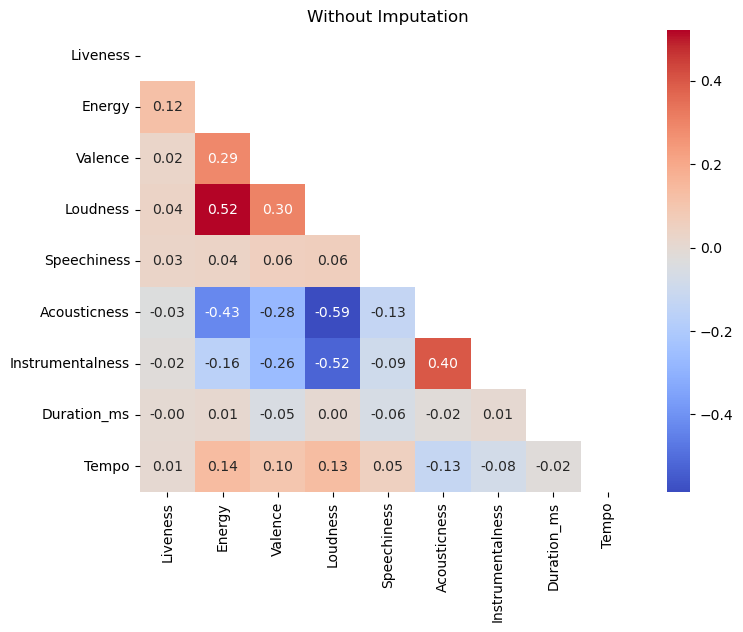

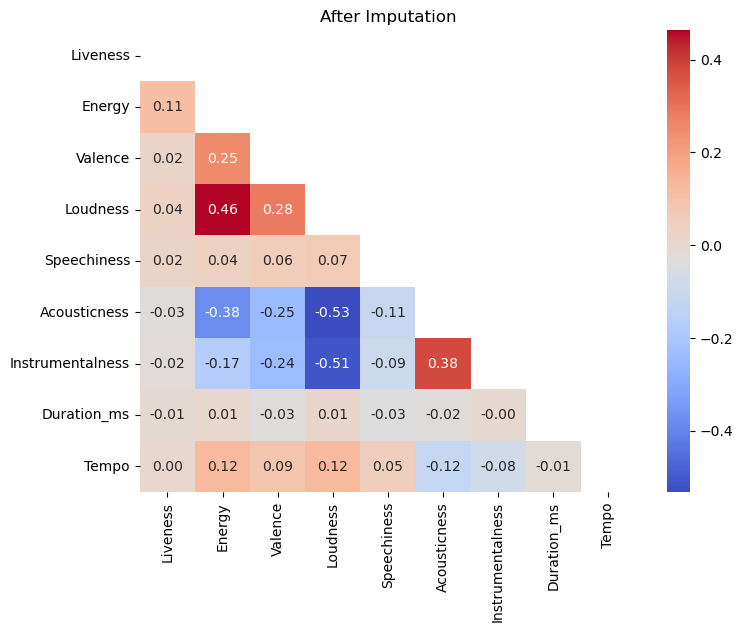

In [34]:
corr_matrix_with_threshold(df_all_to_conditioning_after_conditioning, 0.0, 'Without Imputation')
corr_matrix_with_threshold(df_all_after_conditioning_after_imputer, 0.0, 'After Imputation')



In [48]:
df_train_from_all_after_conditioning_no_label = df_all_after_conditioning_after_imputer.iloc[:len(df_train),:]
df_train_from_all_after_conditioning_with_label = pd.concat([df_train.iloc[:,:1], df_train_from_all_after_conditioning_no_label], axis=1)
df_test_from_all_after_conditioning = df_all_after_conditioning_after_imputer.iloc[len(df_train):,:]

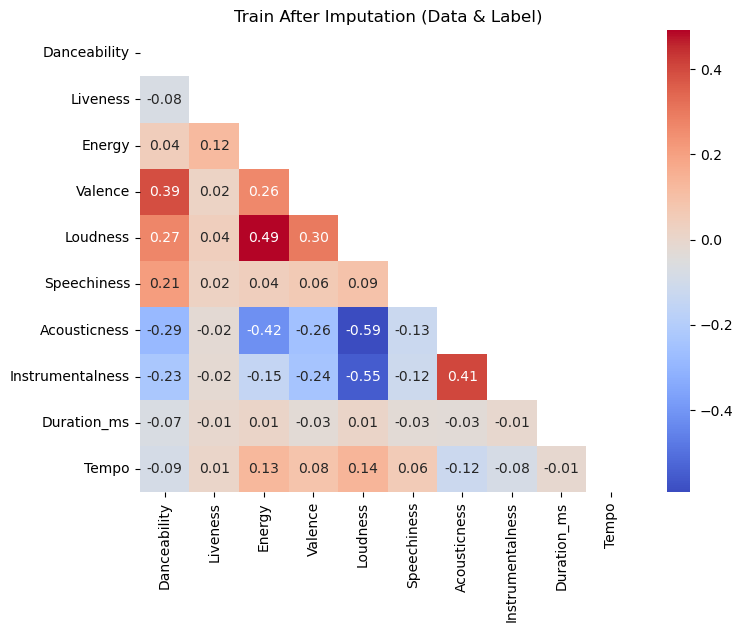

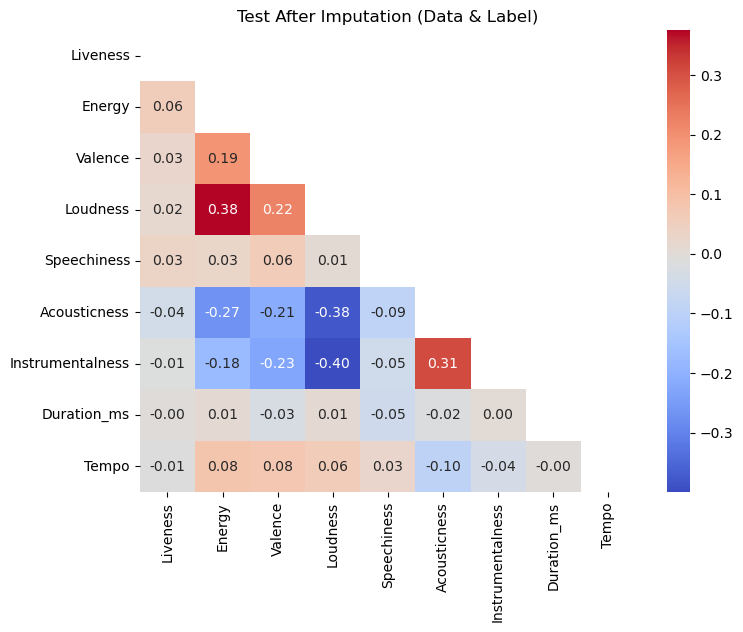

In [49]:
corr_matrix_with_threshold(df_train_from_all_after_conditioning_with_label, 0.0, 'Train After Imputation (Data & Label)')

corr_matrix_with_threshold(df_test_from_all_after_conditioning, 0.0, 'Test After Imputation (Data & Label)')



In [52]:
df_all_final = pd.concat([df_train_from_all_after_conditioning_with_label, df_test_from_all_after_conditioning]).reset_index(drop=True)

arr_index_label_partial_answer = df_test_partial_answer['id'].values
arr_value_label_partial_answer = df_test_partial_answer['Danceability'].values
i = 0
for idx in arr_index_label_partial_answer:
    df_all_final.loc[idx,'Danceability'] = arr_value_label_partial_answer[i]
    i +=1
    
df_validation = df_all_final.loc[arr_index_label_partial_answer]    

print(df_validation.loc[23484])
df_validation.tail(5)

Danceability             2.000000
Liveness                 0.001583
Energy                   0.014679
Valence                  0.735073
Loudness               -17.801213
Speechiness              0.082686
Acousticness             0.076426
Instrumentalness         0.214188
Duration_ms         160431.173035
Tempo                   98.873933
Name: 23484, dtype: float64


,Danceability,Liveness,Energy,Valence,Loudness,Speechiness,Acousticness,Instrumentalness,Duration_ms,Tempo
23462,4.0,0.001309,0.307725,0.770259,-2.533880,0.033415,0.026498,0.013672,123963.758812,95.871722
23463,7.0,0.001355,0.269900,0.466107,-11.299350,0.104984,0.006946,0.001588,193565.214910,103.858359
23473,5.0,0.000114,0.480568,0.287141,-3.828332,0.112933,0.153384,0.001714,193892.112089,91.755727
23482,3.0,0.000662,0.426223,0.087281,-5.807545,0.072906,0.661708,0.898308,185842.047750,87.969239
23484,2.0,0.001583,0.014679,0.735073,-17.801213,0.082686,0.076426,0.214188,160431.173035,98.873933


In [53]:
train_features = df_train_from_all_after_conditioning_with_label.iloc[:,1:]
train_labels   = df_train_from_all_after_conditioning_with_label.iloc[:,:1]
val_features   = df_validation.iloc[:,1:]
val_labels     = df_validation.iloc[:,:1]

In [66]:
train_features

,Liveness,Energy,Valence,Loudness,Speechiness,Acousticness,Instrumentalness,Duration_ms,Tempo
0,0.000807,0.000273,0.340000,-25.176000,0.044300,7.241508e-01,0.000062,117907.0,83.398
1,0.034966,0.184220,0.746000,-16.336667,0.113300,6.722214e-01,0.910000,173427.0,148.692
2,0.001772,0.105294,0.380000,-15.596000,0.069733,6.676276e-01,0.867000,150667.0,84.899
3,0.001000,0.209585,0.229427,-6.251000,0.027700,3.796416e-03,0.218059,265000.0,150.220
4,0.002924,0.533410,0.295000,-5.399829,0.026000,3.048625e-06,0.000467,263867.0,97.997
...,...,...,...,...,...,...,...,...,...
17165,0.000591,0.794023,0.658000,-6.344000,0.032800,8.991539e-02,0.000000,94667.0,90.002
17166,0.000786,0.820026,0.657000,-1.786000,0.109133,2.195200e-05,0.000000,150857.0,174.869
17167,0.003652,0.571787,0.419000,-4.679000,0.064700,8.793188e-02,0.000000,136842.0,168.388
17168,0.001260,0.451218,0.539000,-8.840000,0.419000,4.511802e-02,0.032110,108387.0,155.378


In [56]:
train_labels

,Danceability
0,0.0
1,0.0
2,0.0
3,1.0
4,4.0
...,...
17165,3.0
17166,2.0
17167,1.0
17168,1.0


In [57]:
val_features

,Liveness,Energy,Valence,Loudness,Speechiness,Acousticness,Instrumentalness,Duration_ms,Tempo
18871,0.000634,0.611960,0.823333,-4.584333,0.156567,0.004574,0.000193,2.557730e+05,121.002000
18872,0.003331,0.197375,0.962000,-9.600373,0.091200,0.016777,0.001590,1.718047e+06,121.002000
18873,0.066923,0.148036,0.341581,-10.117000,0.280000,0.000007,0.001985,2.742133e+05,99.439000
18879,0.003049,0.167284,0.391000,-5.293000,0.101000,0.043987,0.000000,3.026020e+05,133.966667
18882,0.000625,0.098611,0.450000,-7.576000,0.040300,0.440711,0.000000,7.748000e+04,125.900000
...,...,...,...,...,...,...,...,...,...
23462,0.001309,0.307725,0.770259,-2.533880,0.033415,0.026498,0.013672,1.239638e+05,95.871722
23463,0.001355,0.269900,0.466107,-11.299350,0.104984,0.006946,0.001588,1.935652e+05,103.858359
23473,0.000114,0.480568,0.287141,-3.828332,0.112933,0.153384,0.001714,1.938921e+05,91.755727
23482,0.000662,0.426223,0.087281,-5.807545,0.072906,0.661708,0.898308,1.858420e+05,87.969239


In [58]:
val_labels

,Danceability
18871,9.0
18872,9.0
18873,8.0
18879,8.0
18882,8.0
...,...
23462,4.0
23463,7.0
23473,5.0
23482,3.0


# All Data

# Try Sofi's Ensemble  (Cascade Level 1)
## Main Feature: Loudness, Speechiness, Acousticness, Instrumentalness, Valence, Composer

In [59]:
class LGBWrapper:
    def __init__(self, params=None, num_boost_round=10):
        self.params = params
        self.num_boost_round = num_boost_round
        self.model = None

    def fit(self, X, y):
        lgb_train = lgb.Dataset(X, y, free_raw_data=False)
        self.model = lgb.train(self.params, lgb_train, num_boost_round=self.num_boost_round)

    def predict(self, X):
        return self.model.predict(X)


In [60]:
# Prepare LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 0,
    'n_jobs': -1
}


In [62]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay


import pickle
regressors = [
    DecisionTreeClassifier(max_depth=None),
    ExtraTreesClassifier(),
    LGBWrapper(params, num_boost_round=200),
#     RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
#     XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(random_state=42), n_jobs=6),
]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(train_features, np.ravel(train_labels))
    pred = reg.predict(val_features)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)

result_table


Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: OneVsOneClassifier


,mae,accuracy
regressors,,
DecisionTreeClassifier,3.015848,0.117274
ExtraTreesClassifier,3.083994,0.139461
LGBWrapper,2.388273,0.120444
RandomForestRegressor,2.366086,0.141046
OneVsOneClassifier,3.185420,0.137876


In [63]:
result_table


,mae,accuracy
regressors,,
DecisionTreeClassifier,3.015848,0.117274
ExtraTreesClassifier,3.083994,0.139461
LGBWrapper,2.388273,0.120444
RandomForestRegressor,2.366086,0.141046
OneVsOneClassifier,3.185420,0.137876


In [64]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

Mean Accuracy 0.1312202852614897


In [65]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

Mean Accuracy 0.1312202852614897


In [67]:
df_train_for_regressor = pd.concat([df_train_from_all_after_conditioning_with_label, df_validation])

# train on the full training set
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(
        df_train_for_regressor.iloc[:, 1:],                # Full X data
        np.ravel(df_train_for_regressor.iloc[:, :1])       # Full Y label
    )

Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: OneVsOneClassifier


In [69]:
def ensemble_predict(regressors, X):
    # Initialize an empty array of predictions
    predictions = np.zeros((X.shape[0], len(regressors)))

    # Generate predictions for each regressor
    for i, reg in enumerate(regressors):
        predictions[:, i] = reg.predict(X)

    # Average the predictions
    avg_predictions = predictions.mean(axis=1)

    return avg_predictions, predictions

# Make ensemble predictions to Validations
ensemble_predictions_l1, all_predictions = ensemble_predict(regressors, df_validation.iloc[:,1:])
accuracy = accuracy_score(np.ravel(df_validation.iloc[:,:1]), np.rint(ensemble_predictions_l1))
mae = mean_absolute_error(np.ravel(df_validation.iloc[:,:1]), np.rint(ensemble_predictions_l1))

print("Acc", accuracy, "MAE", mae)

Acc 0.27258320126782887 MAE 1.1172741679873217


In [73]:
df_train_for_regressor

,Danceability,Liveness,Energy,Valence,Loudness,Speechiness,Acousticness,Instrumentalness,Duration_ms,Tempo
0,0.0,0.000807,0.000273,0.340000,-25.176000,0.044300,0.724151,0.000062,117907.000000,83.398000
1,0.0,0.034966,0.184220,0.746000,-16.336667,0.113300,0.672221,0.910000,173427.000000,148.692000
2,0.0,0.001772,0.105294,0.380000,-15.596000,0.069733,0.667628,0.867000,150667.000000,84.899000
3,1.0,0.001000,0.209585,0.229427,-6.251000,0.027700,0.003796,0.218059,265000.000000,150.220000
4,4.0,0.002924,0.533410,0.295000,-5.399829,0.026000,0.000003,0.000467,263867.000000,97.997000
...,...,...,...,...,...,...,...,...,...,...
23462,4.0,0.001309,0.307725,0.770259,-2.533880,0.033415,0.026498,0.013672,123963.758812,95.871722
23463,7.0,0.001355,0.269900,0.466107,-11.299350,0.104984,0.006946,0.001588,193565.214910,103.858359
23473,5.0,0.000114,0.480568,0.287141,-3.828332,0.112933,0.153384,0.001714,193892.112089,91.755727
23482,3.0,0.000662,0.426223,0.087281,-5.807545,0.072906,0.661708,0.898308,185842.047750,87.969239


In [72]:
df_test_from_all_after_conditioning

,Liveness,Energy,Valence,Loudness,Speechiness,Acousticness,Instrumentalness,Duration_ms,Tempo
17170,0.230346,0.350403,0.733541,-6.679000,0.177000,5.842771e-07,0.002330,222640.000000,138.559000
17171,0.000099,0.347429,0.852000,-5.815000,0.030200,1.209333e-02,0.000687,200173.000000,92.761000
17172,0.001561,0.786330,0.551000,-3.930000,0.052200,7.676563e-05,0.016104,215150.000000,108.014000
17173,0.000262,0.403583,0.578000,-5.810000,0.026000,3.442951e-15,0.509000,233867.000000,120.423000
17174,0.000340,0.334255,0.525000,-8.627000,0.171000,1.619428e-05,0.000000,340920.000000,167.953000
...,...,...,...,...,...,...,...,...,...
23480,0.001642,0.160377,0.160253,-6.366894,0.045451,3.176921e-01,0.006016,233721.956648,72.136829
23481,0.008843,0.318585,0.614366,-4.148566,0.073000,7.419596e-03,0.000817,138726.388393,122.388889
23482,0.000662,0.426223,0.087281,-5.807545,0.072906,6.617082e-01,0.898308,185842.047750,87.969239
23483,0.030605,0.204440,0.482987,-11.563964,0.037676,3.630868e-03,0.491785,180639.352865,144.453000


In [74]:
# Make ensemble predictions to Real TEST
ensemble_predictions_real, all_predictions = ensemble_predict(regressors, df_test_from_all_after_conditioning)


In [75]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_l1
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('L1_cascade_' + datetime_string + '.csv', index=False)

In [76]:
np.rint(predictionsTest)

array([9., 8., 8., 7., 6., 8., 4., 2., 6., 2., 0., 1., 1., 5., 4., 5., 5.,
       4., 2., 3., 4., 3., 4., 5., 5., 4., 5., 3., 4., 3., 4., 4., 4., 5.,
       1., 5., 6., 4., 7., 2., 2., 0., 4., 7., 8., 4., 4., 0., 4., 2., 1.,
       2., 1., 2., 4., 3., 8., 2., 3., 7., 2., 4., 1., 7., 6., 6., 1., 7.,
       6., 1., 7., 3., 4., 6., 5., 4., 7., 6., 5., 1., 3., 2., 6., 7., 4.,
       8., 3., 6., 4., 6., 6., 5., 5., 6., 1., 7., 4., 9., 1., 5., 6., 2.,
       5., 2., 1., 3., 7., 4., 3., 7., 4., 4., 4., 6., 5., 6., 5., 6., 5.,
       6., 5., 0., 4., 4., 4., 7., 5., 8., 0., 5., 5., 4., 4., 4., 2., 2.,
       7., 6., 6., 5., 3., 5., 2., 2., 4., 7., 4., 1., 1., 4., 1., 4., 7.,
       6., 3., 7., 4., 7., 5., 5., 2., 5., 7., 3., 2., 1., 2., 2., 9., 4.,
       4., 3., 7., 2., 3., 7., 8., 7., 3., 5., 5., 3., 6., 7., 3., 5., 7.,
       2., 6., 5., 6., 2., 5., 5., 4., 4., 4., 6., 3., 2., 2., 4., 1., 5.,
       2., 4., 5., 5., 4., 8., 5., 5., 1., 5., 7., 2., 3., 0., 5., 4., 8.,
       5., 5., 5., 8., 5.